# Práctica 2 - Introducción a Network
## Objetivo

Deberá entregar un **notebook de Jupyter** con el título, nombre del autor y el código y resultados pedidos que se enumeran a continuación:

1. Crear la red de la Figura 1:

    1.1. Crear la siguiente red no dirigida

    1.2. Calcular el número de nodos y el número de enlaces

    1.3. Añadir a la red los siguientes atributos tipo string: (nombre=red1), (tipo=no-dirigida)

    1.4. Visualizar la red utilizando un layout aleatorio con las etiquetas de los nodos.

    1.5. Dado un nodo U, e.g. U=6, calcular los vecinos del nodo.

    1.6. En la visualización de la red anterior, cambiar el color del nodo U y todos sus enlaces
 
2. Comprensión de listas con Networkx

    2.1. Mostrar la lista de los grados de los nodos ordenada de mayor a menor

    2.2. Mostrar la lista de tuplas (nodo,grado) ordenada de mayor a menor por el grado

    2.3. Mostrar los 3-nodos con mayor grado

3. Trabajar con atributos de una red

    3.1. A la red anterior, añadir un atributo ‘peso’ a cada enlace creado de acuerdo a una distribución uniforme discreta [1,10].

    3.2. Mostrar todos los enlaces con peso mayor que un umbral W (variable escogida libremente por cada uno)

    3.3. Mostrar la distribución de pesos ordenada de menor a mayor.

    3.4. Visualizar la red utilizando un layout kamada_kawai, con las etiquetas de los nodos, siendo el tamaño de los nodos proporcional a su valor de su grado (multiplicado por 100 como factor de escala).

    3.5. En la visualización anterior, cambiar el color de los 3 nodos de mayor grado.

4. Importar una red

    4.1. Importar la red social del club de karate Zachary (formato gml): http://www-personal.umich.edu/~mejn/netdata/  

    4.2. Calcular el número de nodos y el número de enlaces.

    4.3. Visualizar la red utilizando el layout que considere oportuno, con las etiquetas de los nodos, siendo el tamaño de los nodos proporcional a su valor de grado (multiplicado por 100 como factor de escala).

5. Función “amigos mutuos”

    5.1. Crear una función que tenga como argumentos un objeto grafo y los índices de dos nodos y devuelva una lista de los índices de los nodos vecinos comunes entre ellos (una lista vacía en el caso de que no tengan)



### Creacion de la red

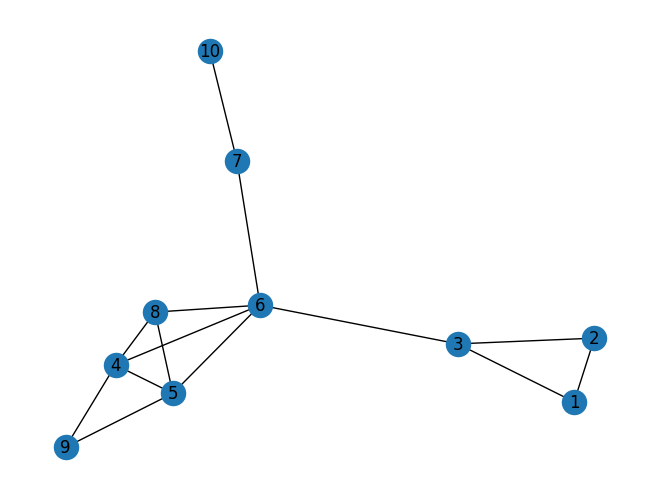

In [2]:
# Imports
import networkx as nx
import matplotlib.pyplot as plt

#Creamos la red no dirigida
G = nx.Graph()

#Agregamos los  10 nodos
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_node(7)
G.add_node(8)
G.add_node(9)
G.add_node(10)

#Agregamos los enlaces
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(3,6)
G.add_edge(6,7)
G.add_edge(6,4)
G.add_edge(6,5)
G.add_edge(6,8)
G.add_edge(7,10)
G.add_edge(4,9)
G.add_edge(4,5)
G.add_edge(4,8)
G.add_edge(9,5)
G.add_edge(5,8)

#Dibujamos la red
nx.draw(G, with_labels=True)
plt.show()



El número de nodos es:  10
El número de enlaces es:  14
Los nodos vecinos de U = 6 son:  [3, 7, 4, 5, 8]


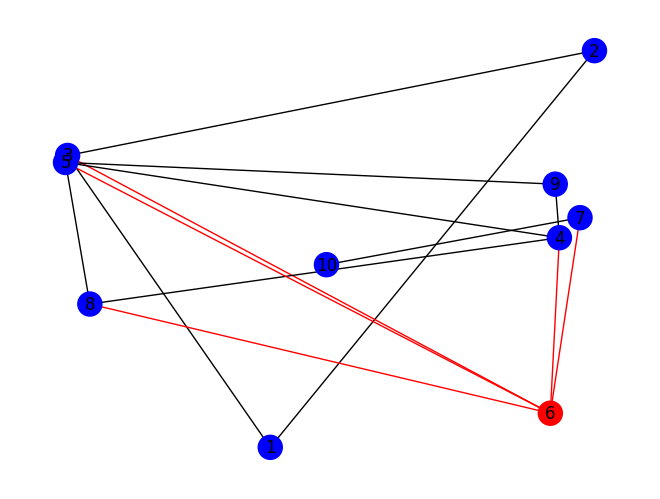

In [3]:
#Calculamos el numero de nodos y enlaces
n_nodos = G.number_of_nodes()
n_enlaces = G.number_of_edges()
print("El número de nodos es: ", n_nodos)
print("El número de enlaces es: ", n_enlaces)

#Añadimos los atributos de nombre y tipo
G.graph['nombre'] = 'Red1'
G.graph['tipo'] = 'No-Dirigida'

#Calculamos los nodos vecinos del nodo U = 6
U = 6
vecinos = list(G.neighbors(U))
print("Los nodos vecinos de U = 6 son: ", vecinos)

#Visualizamos la red con un layout aleatorio, y cambiamos el color del nodo U y de sus enlaces
pos = nx.random_layout(G)
c_enlace = ['red' if U in edge else 'black' for edge in G.edges()]
c_nodo = ['red' if node == U else 'blue' for node in G.nodes()]
nx.draw(G, pos, edge_color=c_enlace, node_color=c_nodo, with_labels=True)
plt.show()


### Comprensión de listas con Network

In [4]:
#Calculamos el grado de cada nodo
grados = dict(G.degree())

#Mostramos la lista de grados ordenada de mayor a menor
lista_grados = sorted(grados.values(), reverse=True)
print("La lista de grados ordenada de mayor a menor es: ", lista_grados)

#Mostramos la lista de tuplas (nodo, grado) ordenada de mayor a menor
lista_tuplas = sorted(grados.items(), key=lambda x: x[1], reverse=True)
print("La lista de tuplas (nodo, grado) ordenada de mayor a menor es: ", lista_tuplas)

#Mostramos los 3 nodos con mayor grado
nodos_mayores = sorted(grados, key=grados.get, reverse=True)[:3]
print("Los 3 nodos con mayor grado son: ", nodos_mayores)

La lista de grados ordenada de mayor a menor es:  [5, 4, 4, 3, 3, 2, 2, 2, 2, 1]
La lista de tuplas (nodo, grado) ordenada de mayor a menor es:  [(6, 5), (4, 4), (5, 4), (3, 3), (8, 3), (1, 2), (2, 2), (7, 2), (9, 2), (10, 1)]
Los 3 nodos con mayor grado son:  [6, 4, 5]


### Trabajar con atributos de una red

Los enlaces con un peso mayor que W = 5 son:  [(1, 2), (1, 3), (4, 5), (5, 6), (5, 8), (6, 8)]
La distribución de pesos ordenada de menor a mayor es:  [1, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 9, 9, 10]


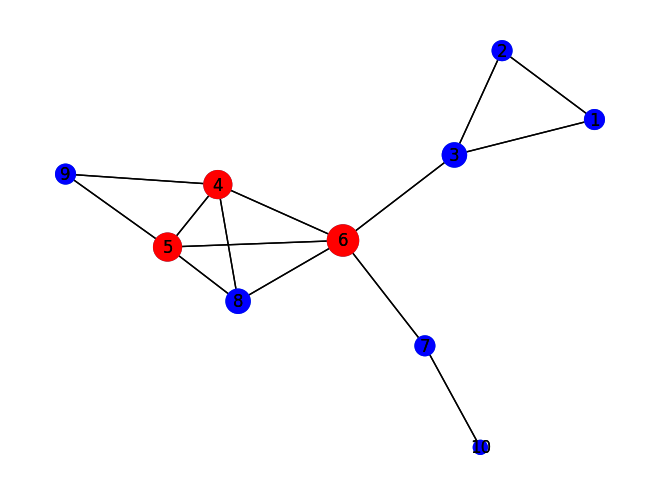

In [7]:
#imports
import random

#Añadimos el atributo peso
for u, v in G.edges():
    G[u][v]['peso'] = random.randint(1, 10)

#Mostramos el peso de los enlaces con un peso mayor que W = 5
W = 5
enlaces_mayor_W = [(u, v) for u, v in G.edges() if G.edges[u,v]['peso'] > W]
print("Los enlaces con un peso mayor que W = 5 son: ", enlaces_mayor_W)

#Mostramos al distrbucion de pesos ordenada de menor a mayor
pesos = nx.get_edge_attributes(G, 'peso')
pesos_ordenados = sorted(pesos.values())
print("La distribución de pesos ordenada de menor a mayor es: ", pesos_ordenados)

#Visualizamos la utilizando un layout kamada_kawai, con las etiquetas de los nodos, siendo el tamaño de los nodos proporcional a su valor de su grado (multiplicado por 100 como factor de escala)
pos = nx.kamada_kawai_layout(G)
tamanos = [G.degree(nodo) * 100 for nodo in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=tamanos)

#Cambiamos el color de los 3 nodos de mayor grado
nodos_mayores = sorted(grados, key=grados.get, reverse=True)[:3]
colores= ['red' if nodo in nodos_mayores else 'blue' for nodo in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=tamanos, node_color=colores)
plt.show()



### Imprtar una red

El número de nodos es:  34
El número de enlaces es:  78


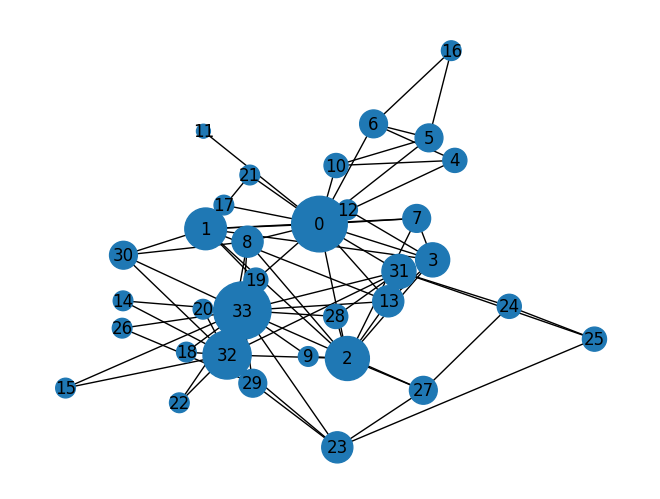

In [9]:
#Imports
import urllib.request

#Importamos la red
G_karate = nx.karate_club_graph()

#Calculamos el numero de nodos y enlaces
n_nodos = G_karate.number_of_nodes()
n_enlaces = G_karate.number_of_edges()
print("El número de nodos es: ", n_nodos)
print("El número de enlaces es: ", n_enlaces)

#Mostramos la red, con las etiquetas de los nodos, siendo el tamaño de los nodos proporcional a su valor de grado (multiplicado por 100 como factor de escala).
pos = nx.kamada_kawai_layout(G_karate)
tamanos = [G_karate.degree(nodo) * 100 for nodo in G_karate.nodes()]
nx.draw(G_karate, pos, with_labels=True, node_size=tamanos)
plt.show()

### Funcion amigos mutuos

In [ ]:
def amigos_mutuos(G,n1,n2):
    '''
    Funcion que toma un objeto grafo y dos nodos y devuelve una lista con los nodos que son amigos mutuos de los dos nodos.
    '''

    #Obtenemos los vecinos de cada nodo
    vecinos_n1 = set(G.neighbors(n1))
    vecinos_n2 = set(G.neighbors(n2))

    #Hacemos la interseccion para conocer los comunes
    amigos_mutuos = vecinos_n1.intersection(vecinos_n2)

    #Devolvemos la lista de amigos mutuos
    return list(amigos_mutuos)

In [ ]:
#hacemos una prueba de la funcion anterior con la primera red creada y entre los nodos 4 y 6

print("Los amigos mutuos de los nodos 4 y 6 son: ", amigos_mutuos(G,4,6))

Los amigos mutuos de los nodos 4 y 6 son:  [8, 5]
